# Real world regression example Kieth Galli


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.


## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

# First Thoughts:

## Goal: Build a regression model to predict the charges column.

**First thought:** From a high level, what do i expect the variables to do to the cost:
- positively correlated to charges: age, bmi, smoker
- region: different areas or more expensive than others

**Second thought, which regression?**
If variable relationship seems:
- **Linear:** then linear regression
- **Exponential:** polynomail regression



# Task 1: Clean Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# load insurance data:
insurance = pd.read_csv('data/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [2]:

## remove any nans rows?
## remove $ sign in charges and make float (maybe round to 2dp)
## make sex,region lower case
## make smoked column binary (1,0)

## remove rows when children, age, bmi, charges is negative
## in sex, if we have F then female, m then male


# Initial view of df
## info(), sample()

In [3]:

print(insurance.info()) # tells you if there are nulls (non-null counts not the same), and dtypes of columns
print(insurance.sample(10)) #keep entering sample to see any issues with the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB
None
       age     sex     bmi  children smoker     region      charges
1212   NaN     NaN  21.470       0.0     no        NaN          NaN
125   26.0  female  28.785       0.0     no  northeast   3385.39915
873   43.0    male  30.100       1.0     no  southwest     6849.026
669   40.0  female  29.810      -1.0     no  southeast    6500.2359
786   60.0    male  36.955       0.0     no  Northeast  12741.16745
1115  55.0    male  32.670       1.0     no  southeast   10807.4863
375   23.

# dropna()

In [4]:
## remove any nans rows?
insurance_clean = insurance.loc[~np.any(insurance.isna(), axis=1),:]
# or
insurance.info() # tells you if there are nulls (non-null counts not the same)
insurance_clean_kieth = insurance.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


# unique()

In [5]:
# make sex,region lower case
insurance_clean[['sex','region']] = insurance_clean[['sex','region']].apply(lambda x: x.str.lower())


# or standardise categories in region to lower
insurance_clean_kieth['region'].unique() # check unique values
insurance_clean_kieth['region'] = insurance_clean_kieth['region'].str.lower()
insurance_clean_kieth['region'].unique() # check if all lower


C:\Users\samfi\AppData\Local\Temp\ipykernel_5488\3862608003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_clean[['sex','region']] = insurance_clean[['sex','region']].apply(lambda x: x.str.lower())
C:\Users\samfi\AppData\Local\Temp\ipykernel_5488\3862608003.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_clean_kieth['region'] = insurance_clean_kieth['region'].str.lower()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# replace()

In [6]:
## in sex, if we have F then female, m then male
insurance_clean['sex'].loc[insurance_clean['sex']=='f'] = 'female'
insurance_clean['sex'].loc[insurance_clean['sex']=='m'] = 'male'


# or standardise sex to two categories
insurance_clean_kieth['sex'].unique() # see what vales to change to male and female

FEMALE = 'female'
MALE = 'male'
sex_map= {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

insurance_clean_kieth['sex'] = insurance_clean_kieth['sex'].replace(sex_map)
insurance_clean_kieth['sex'].unique()

C:\Users\samfi\AppData\Local\Temp\ipykernel_5488\896464894.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  insurance_clean['sex'].loc[insurance_clean['sex']=='f'] = 'female'
C:\Users\samfi\AppData\Local\Temp\ipykernel_5488\896464894.py:2

array(['female', 'male'], dtype=object)

# Make column Bool

In [7]:
# make smoker column boolean
insurance_clean_kieth['smoker'] =(insurance_clean_kieth['smoker']=='yes')
insurance_clean_kieth.info() # check is bool

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 67.2+ KB


C:\Users\samfi\AppData\Local\Temp\ipykernel_5488\4209634013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_clean_kieth['smoker'] =(insurance_clean_kieth['smoker']=='yes')


# strip(), astype()

In [8]:
## remove $ sign in charges and make float (maybe round to 2dp)
# remove $ 
insurance_clean['charges'] = insurance_clean['charges'].str.replace(r'$','', regex=False)
a=insurance_clean=="nan"
insurance_clean = insurance_clean.loc[~np.any(a.values, axis=1),:]

#make numeric
insurance_clean['charges'] = pd.to_numeric(insurance_clean['charges'])

# or standardise charges data type to float
insurance_clean_kieth['charges'].sample(10) #another way to keep checking column values
insurance_clean_kieth['charges'] = insurance_clean_kieth['charges'].str.strip('$').astype('float64')

C:\Users\samfi\AppData\Local\Temp\ipykernel_5488\2265224997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_clean['charges'] = insurance_clean['charges'].str.replace(r'$','', regex=False)
C:\Users\samfi\AppData\Local\Temp\ipykernel_5488\2265224997.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_clean_kieth['charges'] = insurance_clean_kieth['charges'].str.strip('$').astype('float64')


# stack overflow look up

In [9]:
# remove rows when children, age, bmi, charges is negative
insurance_clean = insurance_clean.loc[~np.any(insurance_clean[['children', 'age', 'bmi', 'charges']] <0,axis=1),:]

# or make all negative values in number columns absolute values
# researched this on stack
insurance_clean_kieth = insurance_clean_kieth.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x) # if column dtypes is number then we perform abs

insurance_clean_kieth.to_csv('data_cleaned_insurance.csv',index=False)
insurance_clean_kieth.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,True,southwest,16884.92400
1,18.0,male,33.770,1.0,False,southeast,1725.55230
2,28.0,male,33.000,3.0,False,southeast,4449.46200
3,33.0,male,22.705,0.0,False,northwest,21984.47061
4,32.0,male,28.880,0.0,False,northwest,3866.85520


# Task 2: Scatterplots of relationships between variables(independent) and charges (dependent)

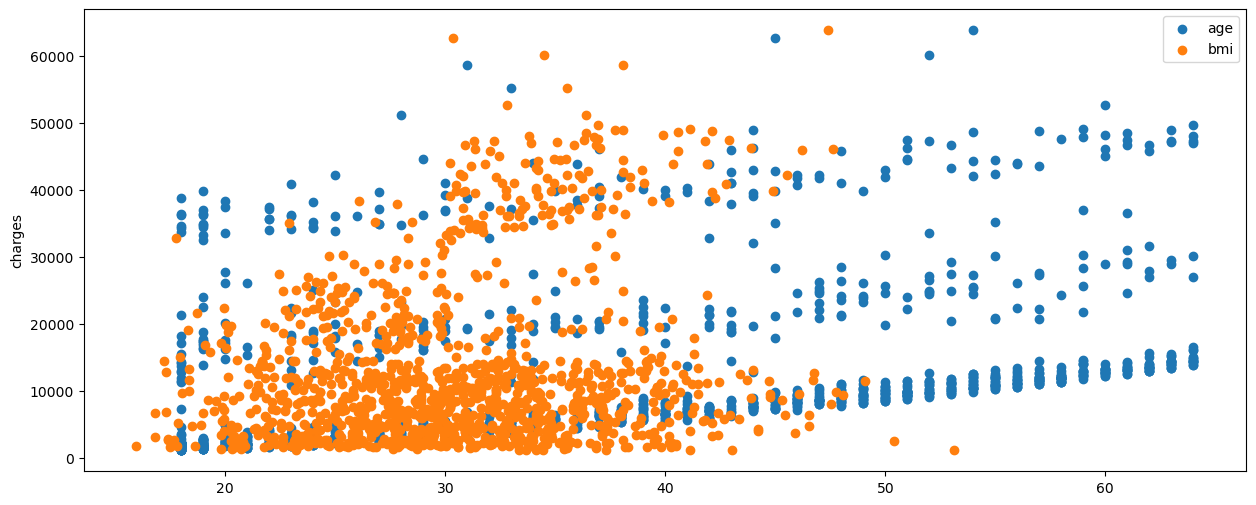

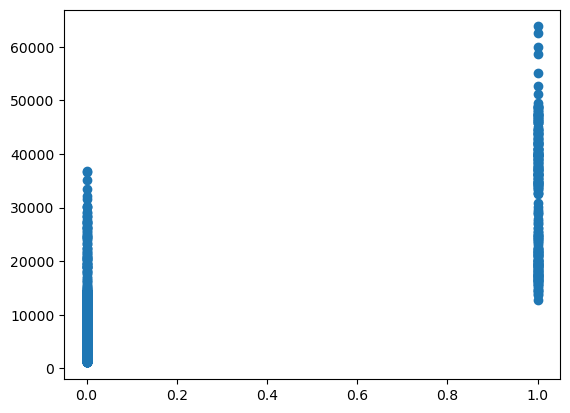

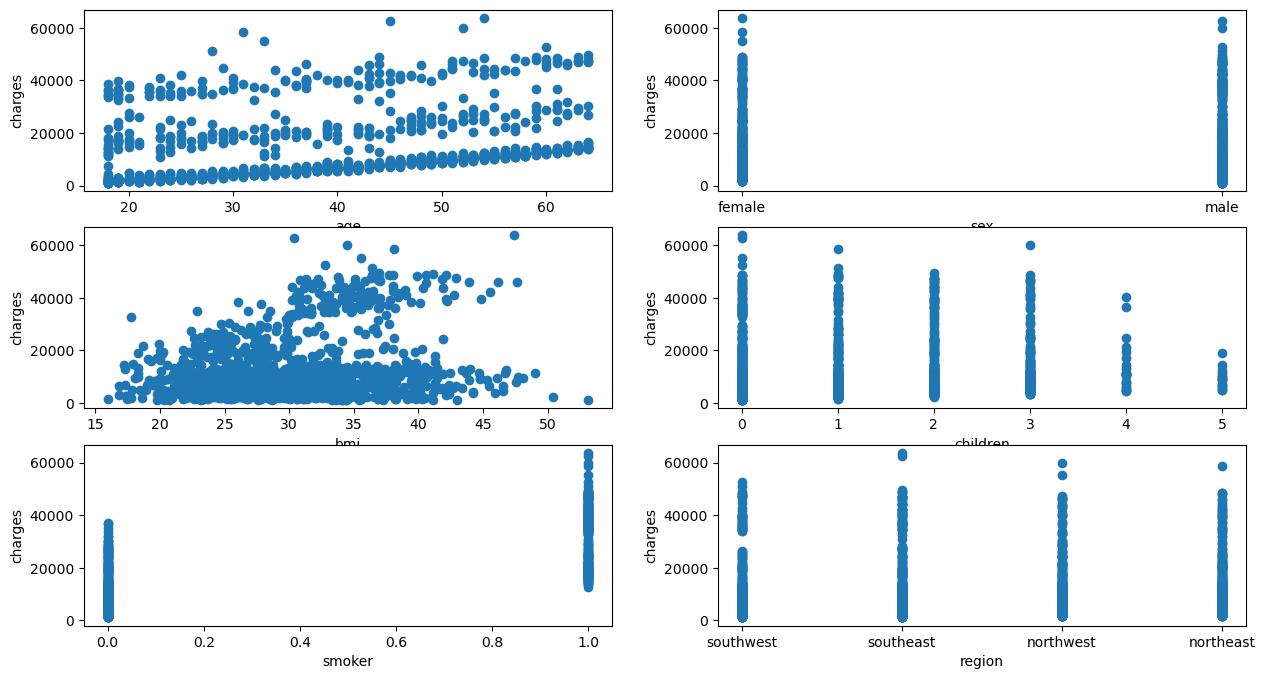

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))
plt.scatter( insurance_clean_kieth['age'],insurance_clean_kieth['charges'], label='age')
plt.scatter( insurance_clean_kieth['bmi'],insurance_clean_kieth['charges'], label = 'bmi')
plt.ylabel('charges')
plt.legend(loc='upper right')
plt.show()


#or just 
df = insurance_clean_kieth.copy()

plt.scatter(df['smoker'], df['charges'])
plt.show()

# or i could do subplots:

fig, ax = plt.subplots(3,2, figsize=(15,8))
ax=ax.flatten()
for i,col in enumerate(df.columns[:-1]):
    ax[i].scatter(df[col], df['charges'])
    ax[i].set_ylabel('charges')
    ax[i].set_xlabel(col)


## check if any non linear relationship incase i need polynomial regression

# Task 3 - Prepare the data for a model fitting

## NOTE:
When fitting a ML model, we prefer data to be numeric and not eg strings.

- First, make data numeric. (binary if categories) 
- **Note:** for eg region, there are 4 values but we do not want to assign eg [0,1,2,3] as this suggests a kind of linear relationship (increasing in size) and the model may fit to that.

## Assigning Binary results to columns with multiple values

## One-Hot Encoding
One-hot encoding is the process of converting categorical data into a numerical format that machine learning algorithms can use. It represents each category with a binary vector (a vector of 0s and 1s), where only one element is "hot" (1) and all others are "cold" (0). 

eg region:

| is_southeast    | is_southwest | is_northeast | is_northwest |
|-----------|-----------|--------------------|----|
| 1      | 0       | 0       | 0|


## Dummy Encoding:
Same as above but with one less column. If all 3 other columns are 0, then it can deduce the 4th column would be 1

In [11]:
# perform dummy encoding on region column

df_new = pd.get_dummies(df, prefix=['region'], columns=['region'], dtype=int)
df_new

# this returns 4 columns, for ML we can drop one column (column with highest count)
df['region'].value_counts() #southeast is largest
df_new = df_new.drop(columns=['region_southeast']) # if the other regions are 0, we know this is 1
df_new

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest
0,19.0,female,27.900,0.0,True,16884.92400,0,0,1
1,18.0,male,33.770,1.0,False,1725.55230,0,0,0
2,28.0,male,33.000,3.0,False,4449.46200,0,0,0
3,33.0,male,22.705,0.0,False,21984.47061,0,1,0
4,32.0,male,28.880,0.0,False,3866.85520,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,False,10600.54830,0,1,0
1334,18.0,female,31.920,0.0,False,2205.98080,1,0,0
1335,18.0,female,36.850,0.0,False,1629.83350,0,0,0
1336,21.0,female,25.800,0.0,False,2007.94500,0,0,1


In [13]:
# make smoker, sex binary

df_new['smoker'] = df_new['smoker'].astype('int64')
df_new['is_male'] = (df_new['sex']=='male').astype('int64')
df_new = df_new.drop(columns=['sex']) 
df_new.head()

KeyError: 'sex'

# Task 4: Fit a linear regression model to our data